In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/ML_Churn/data/Churn_Modelling.csv'

In [3]:
df = pd.read_csv('data/Churn_Modelling.csv')
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Cek Label dataset
df.Exited.value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

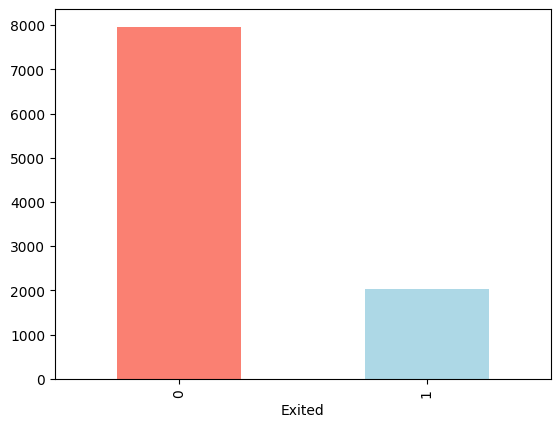

In [5]:
df["Exited"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df_copy = df.copy()

## Merubah fitur kategorikal menjadi numerikal

In [6]:
categorical_df = df[[ "Surname","Geography","Gender"]]
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# use LabelEncoder to encode Categorical Variable
for label in categorical_df[0:]:
  df_copy[label]= label_encoder.fit_transform(df_copy[label])

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int32  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


Mengecek Korelasi antar fitur

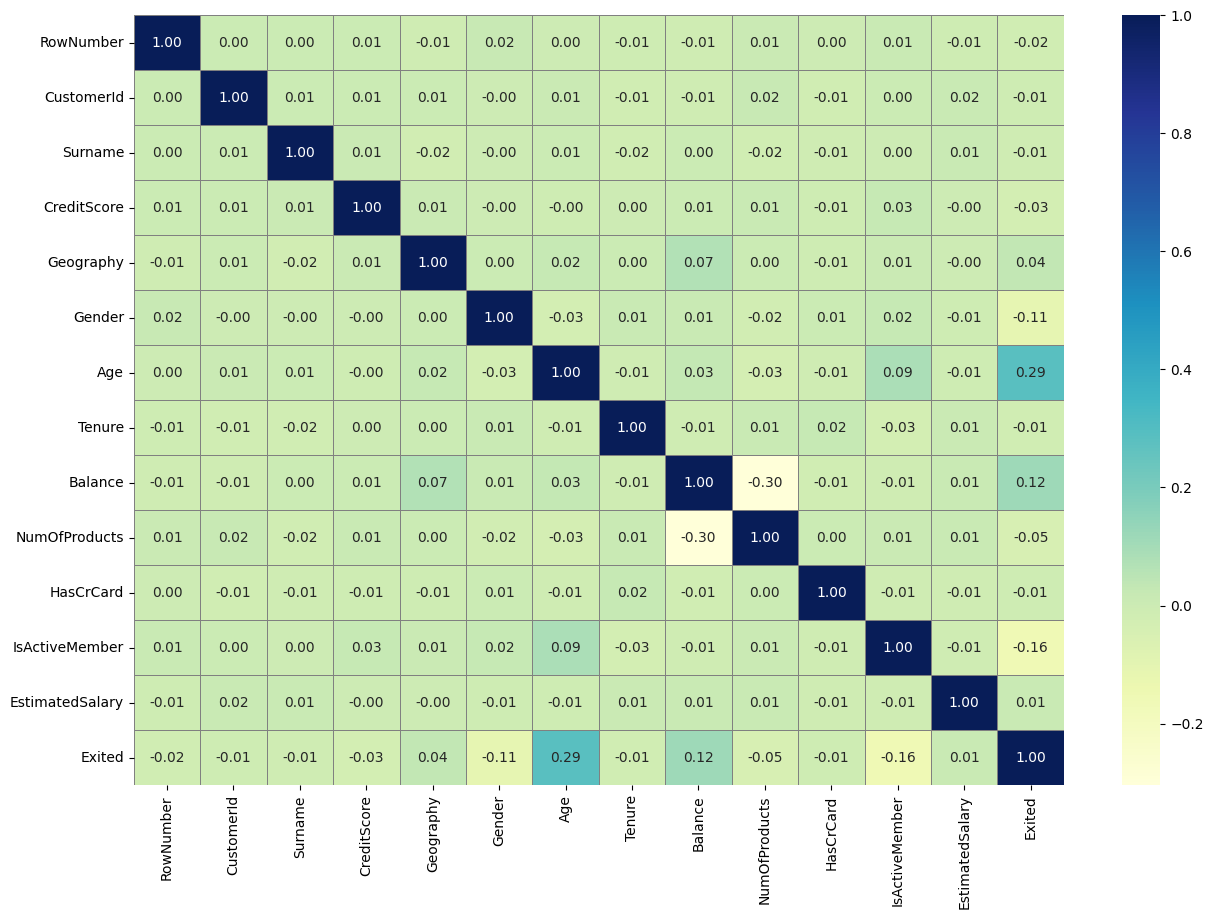

In [9]:
corr_matrix = df_copy.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                linecolor="gray",
                cmap="YlGnBu");

In [7]:
# split dataset into x,y
X = df_copy.drop(columns=['Exited','RowNumber','CustomerId','Surname'],axis=1)
y = df_copy['Exited']
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [21]:
from imblearn.over_sampling import NeighborhoodCleaningRule

# Perform oversampling using RandomOverSampler
X_resampled, y_resampled = NeighborhoodCleaningRule().fit_resample(X, y)

# Print the value counts of the resampled target variable
print(y_resampled.value_counts())


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\User\Desktop\ML_Churn\.venv\lib\site-packages\sklearn\utils\_param_validation.py)

In [9]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X ,#independent variable
                                                   y ,#dependent variable
                                                   test_size=0.2)

In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [10]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [14]:
X_train

array([[0.72513892, 0.41555783, 0.47      , ..., 0.        , 1.        ,
        0.06099002],
       [0.83766138, 0.86113954, 0.798     , ..., 0.        , 1.        ,
        0.71770319],
       [0.45259423, 0.1818492 , 0.37      , ..., 1.        , 1.        ,
        0.82711053],
       ...,
       [0.96800675, 0.59570113, 0.634     , ..., 1.        , 0.        ,
        0.48752886],
       [0.4231734 , 0.42784033, 0.744     , ..., 0.        , 0.        ,
        0.77040713],
       [0.56236023, 0.84373934, 0.694     , ..., 1.        , 1.        ,
        0.26787338]])

In [11]:
# define model
gnb = GaussianNB()
# fit it
gnb.fit(X_train,y_train)
# test
y_pred = gnb.predict(X_test)
train_pred = gnb.predict(X_train)

# performance
print(f'Clasification Report Testing Data : \n {classification_report(y_test,y_pred)}')
print(f'Clasification Report Training Data : \n {classification_report(y_train,train_pred)}')

Clasification Report Testing Data : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.68      0.24      0.35       393

    accuracy                           0.83      2000
   macro avg       0.76      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000

Clasification Report Training Data : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      6356
           1       0.77      0.25      0.37      1644

    accuracy                           0.83      8000
   macro avg       0.80      0.61      0.64      8000
weighted avg       0.82      0.83      0.79      8000



Menyimpan Model

In [22]:
import pickle
pickle.dump(gnb, open("modelGnb2.pkl", "wb"))